In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt 

The mean and variance of f(x) = 2x is
('Mean result', 70.0506, 'Var result', 6.565144784784788)
('Theoretical mean', 66.0, 'Var', 5.5)


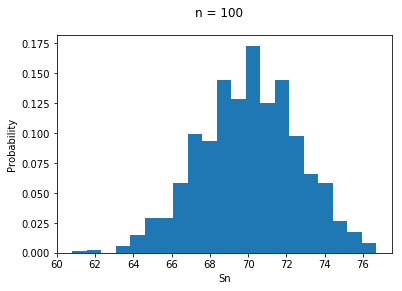

In [8]:
#the distribution taken here is f(x)= 2x, 0<x<1. Its a good distribution
def findVar(array,mean):
    var = 0
    for i in range(0,len(array)):
        var+= (array[i] - mean)**2
    var = var/(len(array)-1)
    return var




def main():
    xArray=[]
    initial =0
    for i in range(0,11): # as the distribution function is triangular, 0<X<1
        if i==0: 
            xArray.append(round(initial,1))
            initial = initial+0.1
            continue
        xArray.append(round(initial,1))
        initial = initial+0.1
    print("The mean and variance of f(x) = 2x is")
    sampleSize = 100
    occurances = []
    for i in range(0,len(xArray)):# multiplying x with the sample size to get its occurances
        occurances.append(abs((int)(2*xArray[i]*sampleSize)))
    sample = []
    for i in range(0,len(occurances)): # making an array with different occurances of values  0/<X<1 based on the triangular distribution
        for j in range(0,occurances[i]):
            sample.append(xArray[i])

    sample = np.array(sample)
    np.random.shuffle(sample)# shuffling the array, so each sample drawn from array is an independent event
    newSampleSize = len(sample)

    n=100
    SnArray = dict()
    noOfTrials = 1000
    histArray=[]
    for i in range(0,noOfTrials): # looping to find Sn and storing in an array 
        rvValues = []
        for j in range(0,n):
            randomSample = sample[random.randint(0,len(sample)-1)]
            rvValues.append(randomSample)
        Sn = round(sum(rvValues),2)
        histArray.append(Sn)
        if Sn in SnArray: #this part can be deleted
            SnArray[Sn] += 1
        else:
            SnArray[Sn] = 1
    

    resultMean = sum(histArray)/len(histArray)
    resultVar = findVar(histArray,resultMean)
    print("Mean result",resultMean,"Var result",resultVar)
    print("Theoretical mean",n*0.66, "Var",n*0.055 )
    plt.xlabel("Sn")
    plt.ylabel("Probability")
    plt.hist(histArray,bins=21,density=True) # plots histogram using occurances of each Sn
    

    temp = "n = " + str(n)
    plt.suptitle(temp)
    plt.show()


main()

